# Persiapan Dataset

Dataset ini menunjukkan konsol video game yang telah diproduksi sepanjang searah. Setiap kolom mewakili informasi rinci seperti 'Console Name', 'Type', 'Company', 'Gen', 'Gen Years', 'Released Year', 'Generation', 'Discontinuation Year', 'Units sold (million)', 'Remarks', 'Link to gif'.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:/Kuliah/Semester 4/Penambangan Data dan Analisis Bisnis/Tugas Data Mining/Tugas Visualisasi Data_M Zidane Yanfa N_2304220004/Console_Data.csv')
df.head()

,Console Name,Type,Company,Gen,Gen Years,Released Year,Generation,Discontinuation Year,Units sold (million),Remarks,Link to gif
0,Magnavox Odyssey,Home,Magnavox,1st Gen,1972-1978,1972,1,1975,0.35,The Magnavox Odyssey is the first commercial ...,https://s12.gifyu.com/images/SVLO3.gif
1,Home Pong,Home,Atari,1st Gen,1972-1978,1975,1,1978,0.15,Atari's Home Pong was a dedicated console that...,https://s12.gifyu.com/images/SVz99.gif
2,Atari 2600,Home,Atari,2nd Gen,1978-1982,1977,2,1992,30.00,Atari2600 is often credited with popularizing ...,https://s12.gifyu.com/images/SVz3U.gif
3,Magnavox Odyssey 2,Home,Magnavox,2nd Gen,1978-1982,1978,2,1984,2.00,The Odyssey² featured a built-in keyboard for ...,https://s12.gifyu.com/images/SVz70.gif
4,Intellivision,Home,Mattel,2nd Gen,1978-1982,1979,2,1990,3.00,The Intellivision boasted superior graphics an...,https://s12.gifyu.com/images/SVLBF.gif


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Console Name          26 non-null     object 
 1   Type                  26 non-null     object 
 2   Company               26 non-null     object 
 3   Gen                   26 non-null     object 
 4   Gen Years             26 non-null     object 
 5   Released Year         26 non-null     int64  
 6   Generation            26 non-null     int64  
 7   Discontinuation Year  26 non-null     object 
 8   Units sold (million)  26 non-null     float64
 9   Remarks               26 non-null     object 
 10  Link to gif           26 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.4+ KB


Mengubah tipe data int64 menjadi year

In [54]:
df['Released Year'] = pd.to_datetime(df['Released Year'], format='%Y').dt.year

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Console Name          26 non-null     object 
 1   Type                  26 non-null     object 
 2   Company               26 non-null     object 
 3   Gen                   26 non-null     object 
 4   Gen Years             26 non-null     object 
 5   Released Year         26 non-null     int32  
 6   Generation            26 non-null     int64  
 7   Discontinuation Year  26 non-null     object 
 8   Units sold (million)  26 non-null     float64
 9   Remarks               26 non-null     object 
 10  Link to gif           26 non-null     object 
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 2.3+ KB


## 1. Tren jumlah unit terjual per tahun (Line Chart)

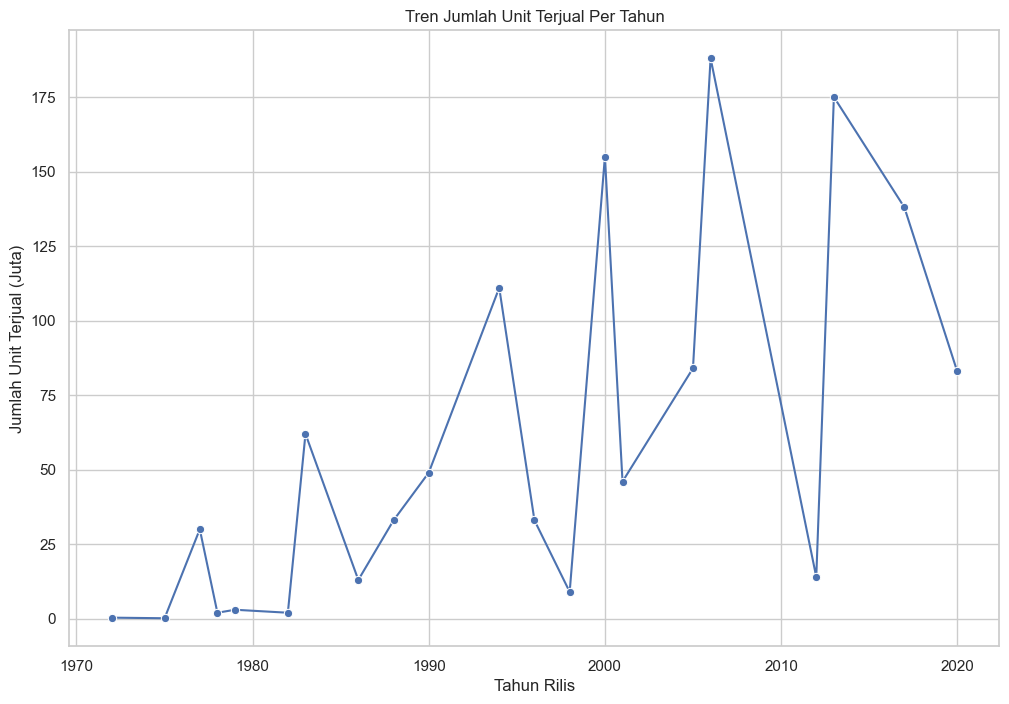

In [56]:

# Setup gaya visual
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# 1. Tren jumlah unit terjual per tahun
sales_trend = df.groupby('Released Year')['Units sold (million)'].sum().reset_index()
sns.lineplot(x='Released Year', y='Units sold (million)', data=sales_trend, marker='o')
plt.title('Tren Jumlah Unit Terjual Per Tahun')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Unit Terjual (Juta)')
plt.show()

## 2. Perbandingan penjualan antar perusahaan (Bar Chart)

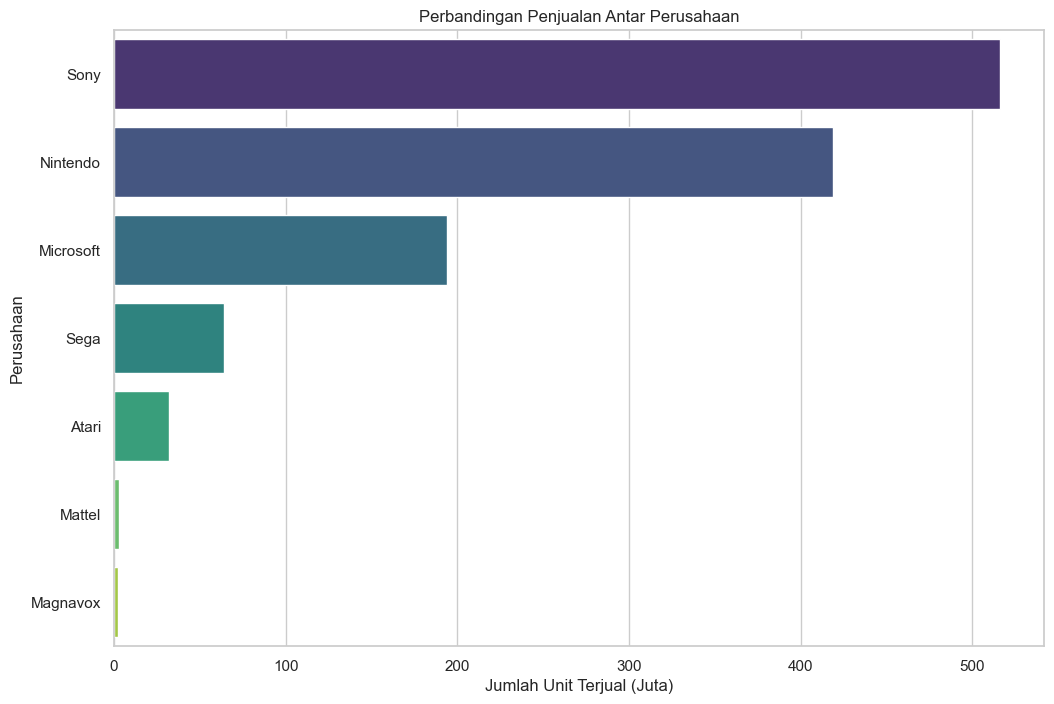

In [58]:
# 2. Perbandingan penjualan antar perusahaan
company_sales = df.groupby('Company')['Units sold (million)'].sum().reset_index().sort_values(by='Units sold (million)', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Units sold (million)', y='Company', data=company_sales, hue='Company', palette='viridis', legend=False)
plt.title('Perbandingan Penjualan Antar Perusahaan')
plt.xlabel('Jumlah Unit Terjual (Juta)')
plt.ylabel('Perusahaan')
plt.show()

## 3. Timeline rilis konsol (Scatter Plot dan Bubble Chart)

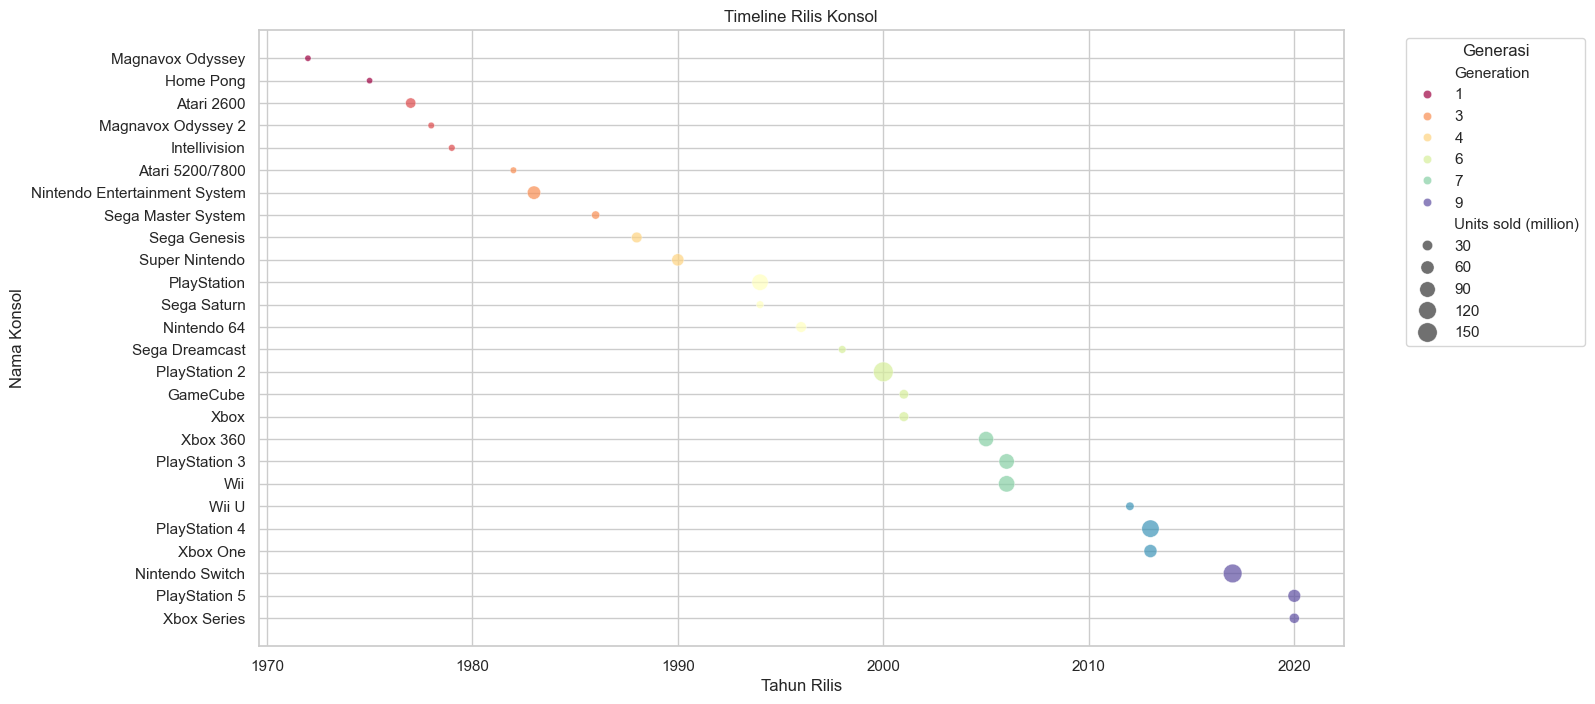

In [65]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Released Year', y='Console Name', data=df, hue='Generation', size='Units sold (million)', sizes=(20, 200), alpha=0.7, palette='Spectral')
plt.title('Timeline Rilis Konsol')
plt.xlabel('Tahun Rilis')
plt.ylabel('Nama Konsol')
plt.legend(title='Generasi', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()